Missing data analysis.


Datasets might hold features with empty observations. For most ML models, to control missing is a must for further fitting. ML practitioners, as well as statisticians, distinguish missings in these three unique cases:  `Completely at Random`, `at Random`, and `Not at Random`. Spotting them might be rather a convoluted task; however, having an inkling about it may lead to `the most suitable imputation technique` task. 

* Missing Completely at Random, a.k.a MCAR, happens when missings show no patterns. When the expected target remains the same between missing and non-missing values. That case generally doesn't cover many samples of a covariate, and a simple imputation technique might suffice.       
* Missing at Random, a.k.a MAR, happens when there is an observable association between nulls of a covariate and values of another covariate. As an example, if rich people are prone to share monthly income than poor, monthly income is missing at random.    
* Missing not at Random, a.k.a MNAR, happens when the apparatus for missing is tangible. To give an intution, people with depression might not fill out a depression forms due to its depression.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

In [2]:
X_raw, y_raw = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)

X_raw.drop(['home.dest'], axis=1, inplace=True)

/home/jean/.cache/pypoetry/virtualenvs/ml-review-GR21w9uC-py3.9/lib/python3.9/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


#### Getting up to speed with the dataset at hand.

In [3]:
X = X_raw.copy()
y = y_raw.copy()

X.head(20)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,None
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN
5,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN
6,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN
7,1.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,None,NaN
8,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN
9,1.0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,None,C,None,22.0


Dataset has plenty nulls and some columns with mixed values, such as the column `ticket`. I'll tweak the last one to behave as `int`.

In [4]:
X['ticket'] = X['ticket'].apply(lambda ticket: ticket.split(' ')[-1] if len(ticket.split(' ')) > 1 else ticket)
X['ticket'] = X['ticket'].replace('LINE', 2656) 
X['ticket'] = X['ticket'].astype(int)

In [5]:
## initial definition of data, features and the target.
y = y.astype('int')

FEATURES = list(X.columns)
X['target'] = y

Beholding dataset's structure

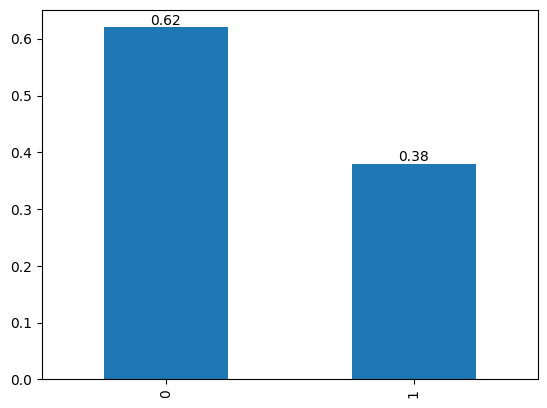

In [6]:
ax = y.value_counts(normalize=True).round(2).plot(kind='bar')

_ = ax.bar_label(ax.containers[0])

In [7]:
y.mean()

0.3819709702062643

62% of titanic passengers have passed. 38% Survived.

In [8]:
X.dtypes

pclass       float64
name          object
sex         category
age          float64
sibsp        float64
parch        float64
ticket         int64
fare         float64
cabin         object
embarked    category
boat          object
body          object
target         int64
dtype: object

In [9]:
print(' Shape of dataset: ', X.shape)

 Shape of dataset:  (1309, 13)


### 1. Nulls assessment

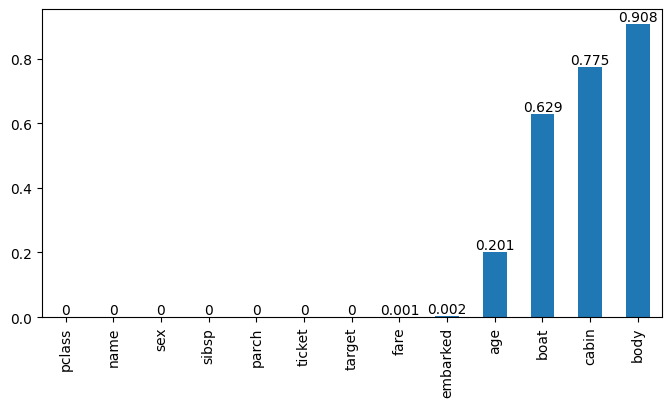

In [10]:
### Quatifying nulls.

# We have 5 features with nulls
ax = (X.isnull().sum()/X.shape[0]).round(3).sort_values().plot.bar(figsize=(8,4))

_ = ax.bar_label(ax.containers[0])

Age has 20% of nulls. Cabin has 77%.

An interesting analysis to assess the `Missing not at random` case evaluates wheter the target can discriminate nulls for not-nulls. So we analyse target distribution when the feature is null; on a mathematical notation: $P(y| x_{feature} == None)$

In [11]:
NULL_FEATURES = ["fare", "embarked", "age", "boat", "cabin", "body"]

In [12]:
# Creating null feature
agg_dict = {}
report_nulls_df = pd.DataFrame()
for null in NULL_FEATURES:
    X[null+'_null'] = X[null].isnull()
    report_nulls_df[null+'_null'] = X[X[null+'_null']].target.value_counts(normalize=True).reset_index().rename(columns={'target':null+'_null'})[[null+'_null']]

In [13]:
report_nulls_df

,fare_null,embarked_null,age_null,boat_null,cabin_null,body_null
0,1.0,1.0,0.722433,0.972053,0.697239,0.579125


When we compare with $P(y)$, where $P(y=0)$ is 0.62 and $P(y=1)$ is 0.38; boat, fare, embarked reveals notable shifts on the probability and really looks like the MNAR case. For Null Imputation, I would leverage the simpĺe imputer technique. Cabin and Body may assume highest frequency or median. For age and home, we might try to infer from other covariates. 

In [14]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [15]:
fare_column = ["fare"]
embarked_column = ["embarked"]
boat_column = ["boat"]

cabin_column = ["cabin"]
body_column = ["body"]

age_homedest_colum = ["age"]



fare_transformer = Pipeline(
                    steps=[("imputer", SimpleImputer(missing_values=np.NaN, strategy="constant", fill_value=0))]
                    )

embarked_transformer = Pipeline(
                    steps=[("imputer", SimpleImputer(missing_values=np.NaN, strategy="constant", fill_value='S'))]
                    )

boat_transformer = Pipeline(
                    steps=[("imputer", SimpleImputer(missing_values=None, strategy="constant", fill_value=-1))]
                    )


cabin_transformer = Pipeline(
                    steps=[("imputer", SimpleImputer(missing_values=None, strategy="most_frequent"))]
                    )

body_transformer = Pipeline(
                    steps=[("imputer", SimpleImputer(missing_values=np.NaN, strategy='median'))]
                    )

age_homedest_transformer = Pipeline(
                    steps=[("imputer", KNNImputer(n_neighbors=2, weights="uniform"))]
                    )


preprocessor = ColumnTransformer(
    transformers=[
        ("fare", fare_transformer, fare_column),
        ("embarked", embarked_transformer, embarked_column),
        ("boat", boat_transformer, boat_column),
        ("cabin", cabin_transformer, cabin_column),
        ("body", body_transformer, body_column),
        ("age", age_homedest_transformer, age_homedest_colum)
    ]
)

In [16]:
preprocessor.fit(X[FEATURES])
fea_columns = list(preprocessor.get_feature_names_out())

temp_dataset = pd.DataFrame(preprocessor.transform(X[FEATURES]), columns=fea_columns)

In [17]:
for cleaned_features in NULL_FEATURES:
    X[cleaned_features] = temp_dataset[cleaned_features+'__'+cleaned_features]

Checking nulls in the dataset.

In [18]:
X.isnull().sum()

pclass           0
name             0
sex              0
age              0
sibsp            0
parch            0
ticket           0
fare             0
cabin            0
embarked         0
boat             0
body             0
target           0
fare_null        0
embarked_null    0
age_null         0
boat_null        0
cabin_null       0
body_null        0
dtype: int64

In [19]:
X.head(10)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,target,fare_null,embarked_null,age_null,boat_null,cabin_null,body_null
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0,0.0,0.0,24160,211.3375,B5,S,2,155.0,1,False,False,False,False,False,True
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.55,C22 C26,S,11,155.0,1,False,False,False,False,False,True
2,1.0,"Allison, Miss. Helen Loraine",female,2.0,1.0,2.0,113781,151.55,C22 C26,S,-1,155.0,0,False,False,False,True,False,True
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1.0,2.0,113781,151.55,C22 C26,S,-1,135.0,0,False,False,False,True,False,False
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1.0,2.0,113781,151.55,C22 C26,S,-1,155.0,0,False,False,False,True,False,True
5,1.0,"Anderson, Mr. Harry",male,48.0,0.0,0.0,19952,26.55,E12,S,3,155.0,1,False,False,False,False,False,True
6,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0,1.0,0.0,13502,77.9583,D7,S,10,155.0,1,False,False,False,False,False,True
7,1.0,"Andrews, Mr. Thomas Jr",male,39.0,0.0,0.0,112050,0.0,A36,S,-1,155.0,0,False,False,False,True,False,True
8,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2.0,0.0,11769,51.4792,C101,S,D,155.0,1,False,False,False,False,False,True
9,1.0,"Artagaveytia, Mr. Ramon",male,71.0,0.0,0.0,17609,49.5042,C23 C25 C27,C,-1,22.0,0,False,False,False,True,True,False


In [20]:
## Fixing types after fillnas.
cov_dtypes = {'pclass' : 'category',
              'age' : 'int64',
              'sibsp': 'category',
              'parch': 'category',
              'fare': 'float64',
              'embarked': 'category',
              'body': 'float64'
             }

X = X.astype(cov_dtypes)

### 2. Cardinality

In [21]:
X.head(5)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,target,fare_null,embarked_null,age_null,boat_null,cabin_null,body_null
0,1.0,"Allen, Miss. Elisabeth Walton",female,29,0.0,0.0,24160,211.3375,B5,S,2,155.0,1,False,False,False,False,False,True
1,1.0,"Allison, Master. Hudson Trevor",male,0,1.0,2.0,113781,151.5500,C22 C26,S,11,155.0,1,False,False,False,False,False,True
2,1.0,"Allison, Miss. Helen Loraine",female,2,1.0,2.0,113781,151.5500,C22 C26,S,-1,155.0,0,False,False,False,True,False,True
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30,1.0,2.0,113781,151.5500,C22 C26,S,-1,135.0,0,False,False,False,True,False,False
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1.0,2.0,113781,151.5500,C22 C26,S,-1,155.0,0,False,False,False,True,False,True


In [22]:
NUMERIC_COLUMN = X[FEATURES]._get_numeric_data().columns
CATEGORICAL_COLUMN = list(set(FEATURES) - set(NUMERIC_COLUMN))

In [23]:
### number of levels per categorical variable.
for cat in CATEGORICAL_COLUMN:
    print('Feature ', cat, ' has ', len(X[cat].unique()), ' unique levels')

print('Dataset has shape ', X.shape)

Feature  cabin  has  186  unique levels
Feature  sibsp  has  7  unique levels
Feature  name  has  1307  unique levels
Feature  sex  has  2  unique levels
Feature  pclass  has  3  unique levels
Feature  parch  has  8  unique levels
Feature  embarked  has  3  unique levels
Feature  boat  has  28  unique levels
Dataset has shape  (1309, 19)


Feature `name`, and `cabin` have high cardinality.

Features with high cardinality, such as: `name` and `cabin` demands process to extract the gist os theirs. For example, for `Cabin` we can extract the first word; `name` the last name and title. Let's apply those techniques.

In [24]:
FEATURES

['pclass',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'ticket',
 'fare',
 'cabin',
 'embarked',
 'boat',
 'body']

In [25]:
## Names
X = X.assign(title = X['name'].apply(lambda x: x.split(',')[1].split('.')[0]),
         family = X['name'].apply(lambda x: x.split(',')[0])
        )   
FEATURES.append('title')
FEATURES.append('family')

## Cabin
X = X.assign(cabin_letter = X.cabin.apply(lambda x: str(x[0:1])))
FEATURES.append('cabin_letter')

## Removing features
FEATURES.remove('cabin')
FEATURES.remove('name')

In [26]:
# Evaluating cardinality again
for cat in ['cabin_letter', 'family', 'title']:
    print('Feature ', cat, ' has ', len(X[cat].unique()), ' unique levels')

print('Dataset has shape ', X.shape)

Feature  cabin_letter  has  8  unique levels
Feature  family  has  875  unique levels
Feature  title  has  18  unique levels
Dataset has shape  (1309, 22)


In [27]:
from category_encoders.count import CountEncoder

## Family still have many level. So we apply the Counting technique, where we replace the family's name 
## with the number of occurencies within the dataset.

ce = CountEncoder()
X['family_en'] = ce.fit_transform(X['family']).astype('category')

## Removing family and adding the encoding one.
FEATURES.remove('family')
FEATURES.append('family_en')

### 3. Rare Labels

In [28]:
NUMERIC_COLUMN = X[FEATURES]._get_numeric_data().columns
CATEGORICAL_COLUMN = list(set(FEATURES) - set(NUMERIC_COLUMN))

In [29]:
### number of levels per categorical variable.
for cat in CATEGORICAL_COLUMN:
    print('Feature ', cat, ' has ', len(X[cat].unique()), ' unique levels')

print('Dataset has shape ', X.shape)

Feature  cabin_letter  has  8  unique levels
Feature  sibsp  has  7  unique levels
Feature  sex  has  2  unique levels
Feature  pclass  has  3  unique levels
Feature  title  has  18  unique levels
Feature  parch  has  8  unique levels
Feature  embarked  has  3  unique levels
Feature  family_en  has  9  unique levels
Feature  boat  has  28  unique levels
Dataset has shape  (1309, 23)


In [30]:
def plot_categories(df, columns):
    
    plt.figure(figsize=(9,7))
    
    for index in range(len(columns)):
        
        var = columns[index]
    
        bar = df[var].value_counts(normalize=True)
        line = df.groupby(var).target.mean()

        plt.subplot(3, 3, index++1)
        plt.xticks(rotation=90)
        plt.xlabel(var)

        ax = bar.plot.bar(color='gold')
        ax.set_ylabel('% of subjects per level', color='gold')
        ax.axhline(y=0.01, color='red', linestyle='-')


        ax2 = ax.twinx()
        ax2 = line.plot(color='purple')      
        ax2.set_ylabel('% of 1 per level', color='purple')
        #plt.tight_layout()
    plt.tight_layout()
    plt.show()

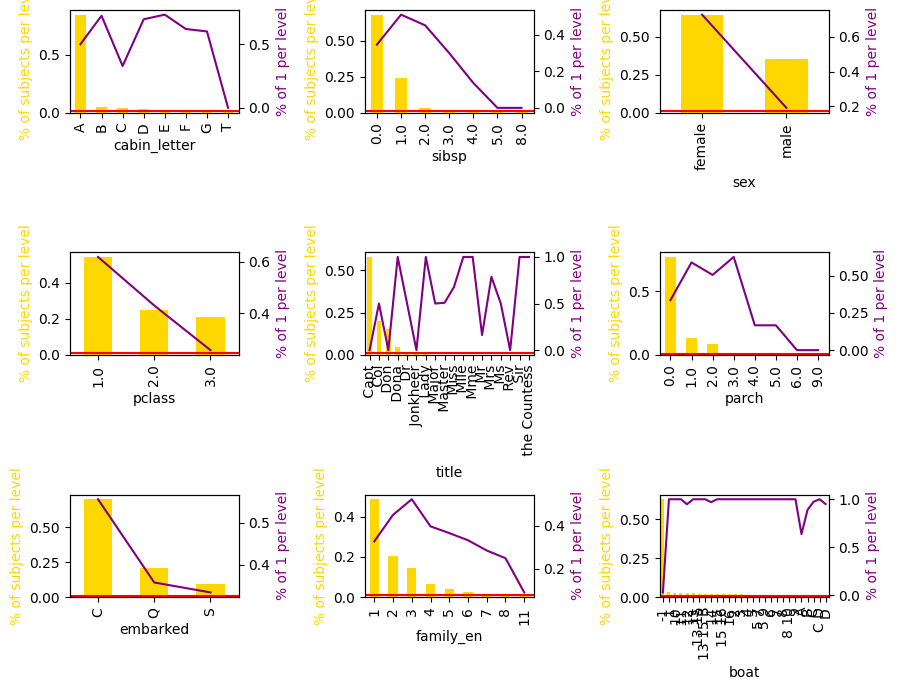

In [31]:
plot_categories(X, CATEGORICAL_COLUMN)

ADD a text about Rare levels: those with less than 1% of apperance. Potential data leakeage on `boat`.

### 4. Outliers

In [32]:
NUMERIC_COLUMN = list(NUMERIC_COLUMN)
#NUMERIC_COLUMN.remove('target')

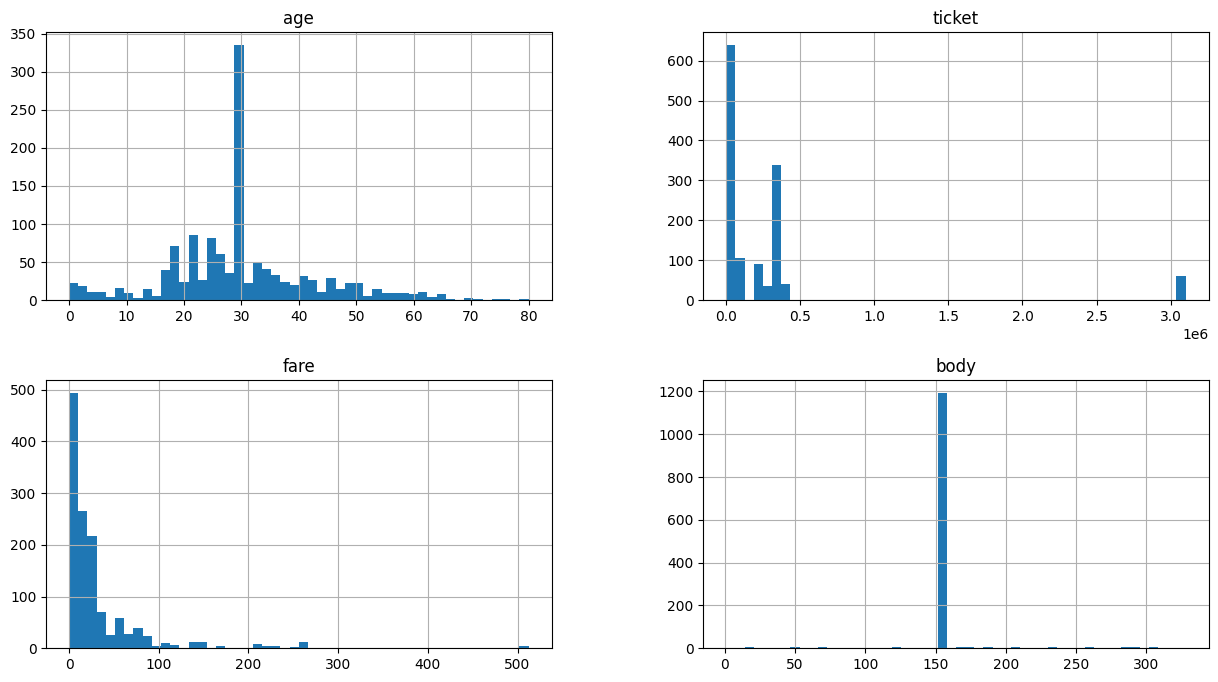

In [33]:
_ = X[NUMERIC_COLUMN].hist(figsize=(15,8), bins=50)

In [34]:
from sklearn.preprocessing import PowerTransformer

for num in NUMERIC_COLUMN:
    X[[num]] = PowerTransformer().fit_transform(X[[num]])

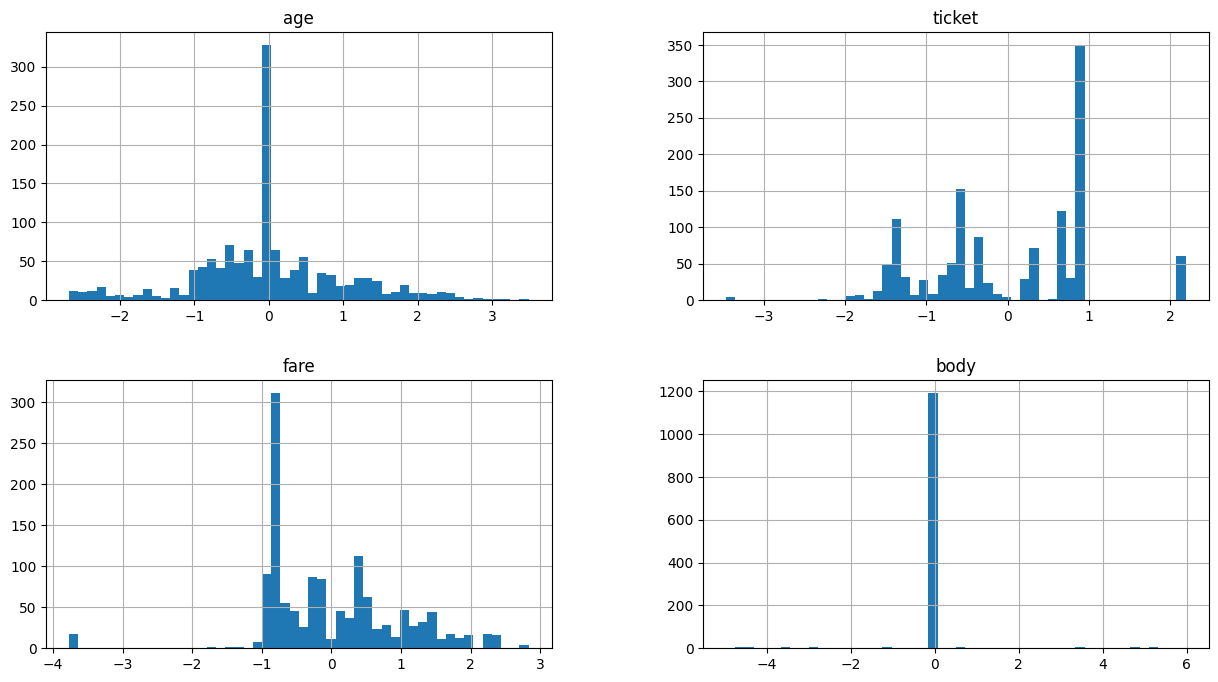

In [35]:
_ = X[NUMERIC_COLUMN].hist(figsize=(15,8), bins=50)

In [36]:
#### Final Pipeline
from sklearn.base import BaseEstimator, TransformerMixin


class CabinFirstLetter(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        f = lambda x: str(x[0:1])
        firstletter = np.vectorize(f)
        return firstletter(X)

    
class TitleExtractor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        f = lambda x: x.split(',')[1].split('.')[0]
        title = np.vectorize(f)
        return title(X)
    
    
class FamilyExtractor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        f = lambda x: x.split(',')[0]
        family = np.vectorize(f)
        return family(X)
    
    
class LocalLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoder = LabelEncoder()
        
    def fit(self, X, y=0):
        return self
    
    def transform(self, X, y=0):
        return self.encoder.fit_transform(X.reshape(-1,1))

In [37]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from feature_engine.encoding import RareLabelEncoder
from category_encoders.count import CountEncoder
from category_encoders.hashing import HashingEncoder

#### Cardinality
## Names
title_extractor_transformer = TitleExtractor()
family_lastname_transformer = FamilyExtractor()
family_lastname_encoder = CountEncoder()

## Cabin
cabin_firstletter_transfomer = CabinFirstLetter()


#### Rare Labels
## 'boat', 'family', 'cabin_letter', 'title', 'sibsp', 'parch'
boat_onehot_transformer = OneHotEncoder(handle_unknown='infrequent_if_exist', min_frequency=0.05)
family_onehot_transformer = OneHotEncoder(handle_unknown='infrequent_if_exist', min_frequency=0.05)
cabin_onehot_transformer = OneHotEncoder(handle_unknown='infrequent_if_exist', min_frequency=0.05)
title_onehot_transformer = OneHotEncoder(handle_unknown='infrequent_if_exist', min_frequency=0.05)
sibsp_onehot_transformer = OneHotEncoder(handle_unknown='infrequent_if_exist', min_frequency=0.05)
parch_onehot_transformer = OneHotEncoder(handle_unknown='infrequent_if_exist', min_frequency=0.05)
embarked_onehot_transformer = OneHotEncoder(handle_unknown='infrequent_if_exist', min_frequency=0.05)

boat_label = LocalLabelEncoder()

#### Power Transformer
## 'age', 'ticket', 'fare', 'body'
age_power_transformer = PowerTransformer()
ticket_power_transformer = PowerTransformer()
fare_power_transformer = PowerTransformer()
body_power_transformer = PowerTransformer()

In [38]:
FARE = 'fare'
EMBARKED = 'embarked'
BOAT = 'boat'
CABIN = 'cabin'
BODY = 'body'
AGE = 'age'
TICKET = 'ticket'
PCLASS = 'pclass'
NAME = 'name'
SEX = 'sex'
SIBSP = 'sibsp'
PARCH = 'parch'


fare_transformer = Pipeline(
                    steps=[("imputer", SimpleImputer(missing_values=np.NaN, strategy="constant", fill_value=0)),
                          ("power_transformer", fare_power_transformer)
                          ]
                    )

embarked_transformer = Pipeline(
                    steps=[("imputer", SimpleImputer(missing_values=np.NaN, strategy="constant", fill_value='S')),
                          ("onehot", embarked_onehot_transformer)]
                    )

boat_transformer = Pipeline(
                    steps=[("imputer", SimpleImputer(missing_values=None, strategy="constant", fill_value='-10')),
                           ("one_hot", boat_onehot_transformer)]
                    )


cabin_transformer = Pipeline(
                    steps=[("imputer", SimpleImputer(missing_values=None, strategy="most_frequent")),
                          ("gist_extractor", cabin_firstletter_transfomer),
                          ("rare_transformer", cabin_onehot_transformer)]
                    )

body_transformer = Pipeline(
                    steps=[("imputer", SimpleImputer(missing_values=np.NaN, strategy='median')),
                          ("power", body_power_transformer)
                          ]
                    )

age_transformer = Pipeline(
                steps=[("imputer", KNNImputer(n_neighbors=2, weights="uniform")),
                      ("power", age_power_transformer)
                      ]
                )

ticket_transfomer = Pipeline(
                steps=[("power", ticket_power_transformer)]
                )


title_transformer = Pipeline(
                steps=[("title", title_extractor_transformer),
                      ("title_enc", title_onehot_transformer)]
                )

family_transformer = Pipeline(
                steps=[("family", family_lastname_transformer),
                      ("family_enc", family_lastname_encoder)]
                )


sibsp_transformer = Pipeline(
                steps=[("rare", sibsp_onehot_transformer),
                      ])

parch_transfomer = Pipeline(
                steps=[("rare", parch_onehot_transformer),
                      ])
    
## SEX and pclass
pclass_sex_transfomer = Pipeline(
                        steps=[("lbl", LabelEncoder())]
                        )

preprocessor = ColumnTransformer(
    transformers=[
        ("fare", fare_transformer, [FARE]),
        ("embarked", embarked_transformer, [EMBARKED]),
        #("boat", boat_transformer, [BOAT]),
        ("cabin", cabin_transformer, [CABIN]),
        ("body", body_transformer, [BODY]),
        ("age", age_transformer, [AGE]),
        ("ticket", ticket_transfomer, [TICKET]),
        ("title", title_transformer, [NAME]),
        ("family", family_transformer, [NAME]),
        ("sibsp", sibsp_transformer, [SIBSP]),
        ("parch", parch_transfomer, [PARCH]),
        ("pclass_sex", OneHotEncoder(), [SEX, PCLASS])
    ]
)

In [39]:
X_raw['ticket'] = X_raw['ticket'].apply(lambda ticket: ticket.split(' ')[-1] if len(ticket.split(' ')) > 1 else ticket)
X_raw['ticket'] = X_raw['ticket'].replace('LINE', 2656) 
X_raw['ticket'] = X_raw['ticket'].astype(int)

X_raw['sibsp'] = X_raw['sibsp'].astype('category')
X_raw['parch'] = X_raw['parch'].astype('category')

In [40]:
preprocessor.fit(X_raw)

ColumnTransformer(transformers=[('fare',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('power_transformer',
                                                  PowerTransformer())]),
                                 ['fare']),
                                ('embarked',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='S',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                min_frequency=0.05))]),
                                 ['embar...
                                                 ('family_enc',
                                                  CountEncoder(combine_min_nan_groups=True))]),
                                 ['name']),
                                ('sibsp',
                                 Pipeline(steps=[('rare',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                min_frequency=0.05))]),
                                 ['sibsp']),
                                ('parch',
                                 Pipeline(steps=[('rare',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                min_frequency=0.05))]),
                                 ['parch']),
                                ('pclass_sex', OneHotEncoder(),
                                 ['sex', 'pclass'])])

In [41]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", XGBClassifier())]
)

print(cross_val_score(clf, X_raw, y_raw.astype(int), scoring='roc_auc', cv=10))

[0.90222222 0.94938272 0.91111111 0.88320988 0.86790123 0.83506173
 0.73901235 0.71666667 0.7217284  0.73575   ]


In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

param_grid = [
    {
        "classifier__eta": [0.05, 0.1, 0.15, 0.2],
        "classifier__max_depth": [3, 6, 9, 15, 20],
        "classifier__tree_method": ["hist"],
        "classifier__lambda": [1, 1.5, 2],
        "classifier__alpha": [0, 0.1, 0.25, 0.5],
    }
]

skf = StratifiedKFold(n_splits=10)
grid_search = GridSearchCV(clf, param_grid, cv=skf, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_search.fit(X_raw, y_raw.astype(int))

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('fare',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=0,
                                                                                                        strategy='constant')),
                                                                                         ('power_transformer',
                                                                                          PowerTransformer())]),
                                                                         ['fare']),
                                                                        ('embarked',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_valu...
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid=[{'classifier__alpha': [0, 0.1, 0.25, 0.5],
                          'classifier__eta': [0.05, 0.1, 0.15, 0.2],
                          'classifier__lambda': [1, 1.5, 2],
                          'classifier__max_depth': [3, 6, 9, 15, 20],
                          'classifier__tree_method': ['hist']}],
             scoring='roc_auc', verbose=1)

In [43]:
mdl = grid_search.best_estimator_

skf = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)
output = cross_val_score(mdl, X_raw, y_raw.astype(int), scoring='roc_auc', cv=skf)
output

array([0.91609756, 0.72      , 0.88780488, 0.84780488, 0.93560976,
       0.84243902, 0.87902439, 0.89463415, 0.8       , 0.938     ,
       0.907     , 0.897     , 0.959     , 0.885     , 0.8625    ,
       0.847     , 0.8775    , 0.887     , 0.942     , 0.8975    ])

In [44]:
%%time
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()

predicted_proba = []
actual = []

for train_index, test_index in loo.split(X):
    mdl.fit(X_raw.iloc[train_index], y_raw.iloc[train_index].astype(int))
    predicted_proba.append(mdl.predict_proba(X_raw.iloc[test_index])[:,1][0])
    actual.append(y_raw.iloc[test_index].astype(int).values[0])

CPU times: user 10min 22s, sys: 2min 15s, total: 12min 37s
Wall time: 3min 59s


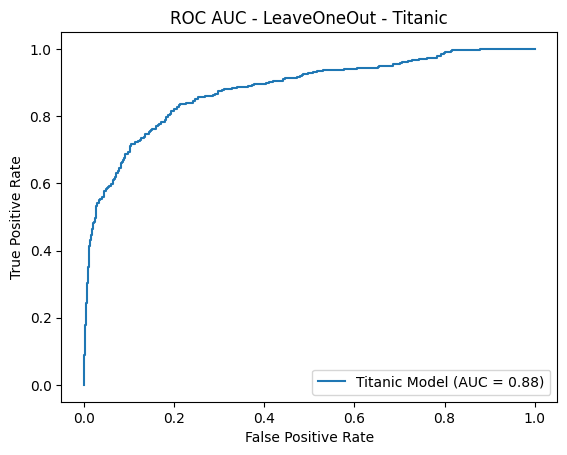

In [45]:
## Final ROC AUC
from sklearn.metrics import roc_curve, auc, RocCurveDisplay


fpr, tpr, thresholds = roc_curve(np.array(actual), np.array(predicted_proba))
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Titanic Model')

display.plot()
plt.title("ROC AUC - LeaveOneOut - Titanic")
plt.show()

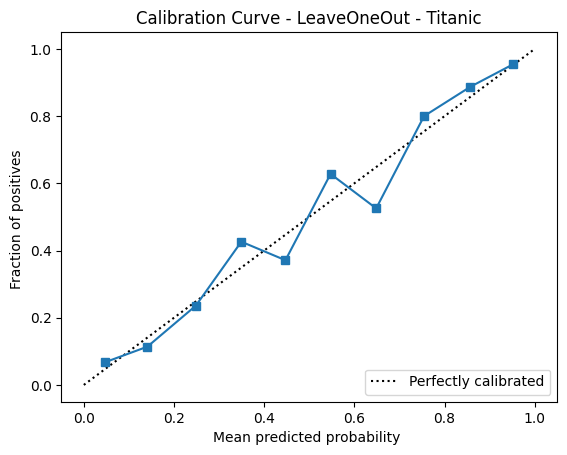

In [51]:
from sklearn.calibration import calibration_curve, CalibrationDisplay

prob_true, prob_pred = calibration_curve(np.array(actual), np.array(predicted_proba), n_bins=10)
disp = CalibrationDisplay(prob_true, prob_pred, np.array(predicted_proba))
disp.plot()
plt.title("Calibration Curve - LeaveOneOut - Titanic")
plt.show()

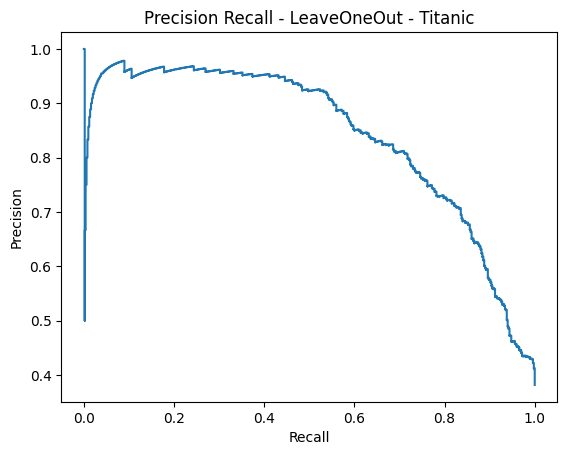

In [47]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay


precision, recall, _ = precision_recall_curve(np.array(actual), np.array(predicted_proba))
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision Recall - LeaveOneOut - Titanic")
plt.show()

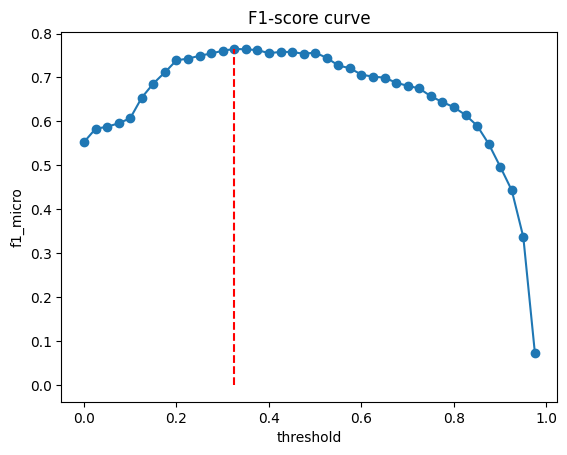

In [48]:
### F1 score per threshold
from sklearn.metrics import f1_score

f1_scores = []
thresholds = np.arange(0, 1, 0.025)
for threshold in thresholds:
    y_pred = (np.array(predicted_proba) >= threshold).astype(int)
    f1_scores.append(f1_score(np.array(actual), y_pred))
    
neat_f1 = f1_scores.index(max(f1_scores))

plt.title('F1-score curve')
plt.plot(thresholds, f1_scores,  marker='o')
plt.vlines(thresholds[neat_f1], ymin=0, ymax=max(f1_scores), 
                linestyles='dashed',
                colors='red')
plt.xlabel('threshold')
plt.ylabel('f1_micro') 
plt.show()

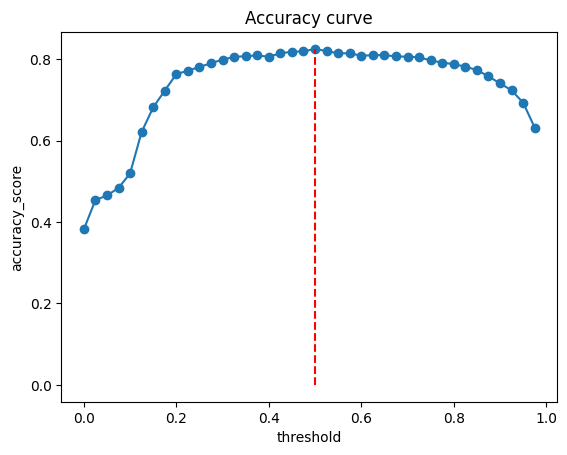

In [49]:
### accuracy per threshold
from sklearn.metrics import accuracy_score

accuracy_scores = []
thresholds = np.arange(0, 1, 0.025)
for threshold in thresholds:
    y_pred = (np.array(predicted_proba) >= threshold).astype(int)
    accuracy_scores.append(accuracy_score(np.array(actual), y_pred))
    
neat_accuracy = accuracy_scores.index(max(accuracy_scores))

plt.title('Accuracy curve')
plt.plot(thresholds, accuracy_scores,  marker='o')
plt.vlines(thresholds[neat_accuracy], ymin=0, ymax=max(accuracy_scores), 
                linestyles='dashed',
                colors='red')
plt.xlabel('threshold')
plt.ylabel('accuracy_score') 
plt.show()

In [50]:
max(accuracy_scores)

0.825057295645531